In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.family'] = 'Arial'

In [14]:
# Đọc dữ liệu
df = pd.read_csv("customer_shopping_data.csv")
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df['Total'] = df['price'] * df['quantity']

In [15]:
# Tổng giao dịch theo thời gian
def visualize_transactions_over_time():
    df_time = df.groupby(df['invoice_date'].dt.to_period("M"))['Total'].sum()
    df_time.index = df_time.index.to_timestamp()

    plt.figure(figsize=(12, 6))
    df_time.plot(kind='line', marker='o', color='blue')
    plt.title("Tổng giao dịch theo thời gian (tháng)")
    plt.xlabel("Thời gian")
    plt.ylabel("Doanh thu ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
# Giao dịch theo trung tâm thương mại
def visualize_transactions_by_location():
    df_loc = df.groupby('shopping_mall')['price'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_loc.values, y=df_loc.index, palette='viridis')
    plt.title("Tổng giao dịch theo trung tâm thương mại")
    plt.xlabel("Doanh thu ($)")
    plt.ylabel("Địa điểm")
    plt.tight_layout()
    plt.show()

In [17]:
# Giao dịch theo giới tính
def visualize_transactions_by_gender():
    df_gender = df.groupby('gender')['Total'].sum()

    plt.figure(figsize=(6, 6))
    plt.pie(df_gender, labels=df_gender.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    plt.title("Tỉ lệ doanh thu theo giới tính")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

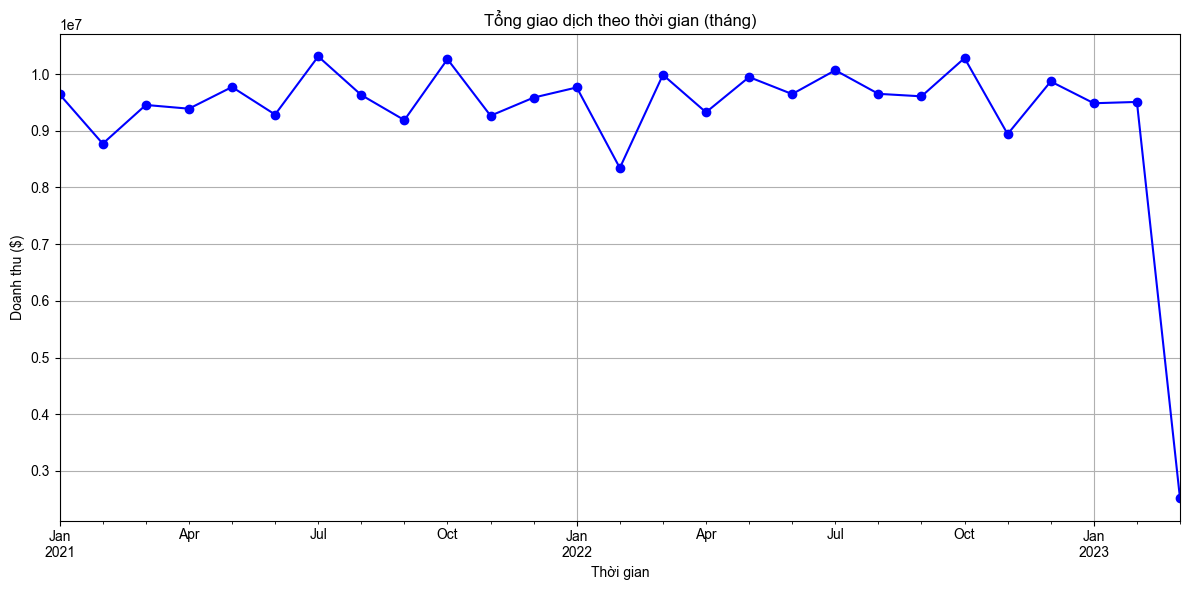

C:\Users\user\AppData\Local\Temp\ipykernel_13228\2323534116.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_loc.values, y=df_loc.index, palette='viridis')


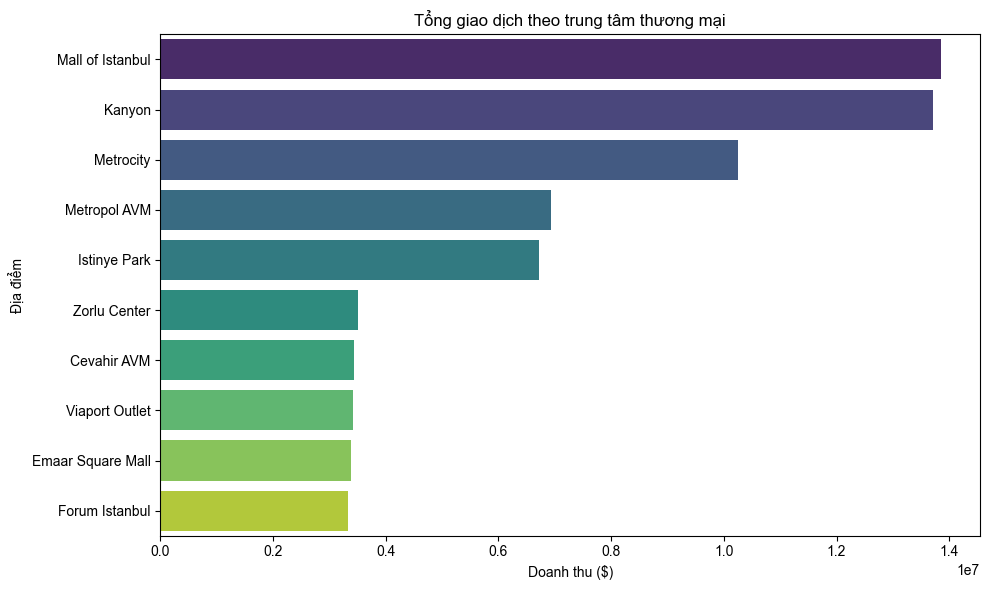

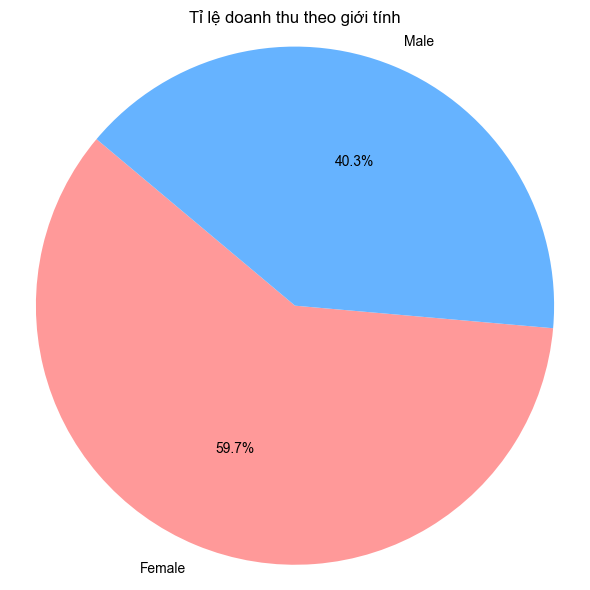

C:\Users\user\AppData\Local\Temp\ipykernel_13228\2706506960.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = df.groupby('age')['price'].sum()
C:\Users\user\AppData\Local\Temp\ipykernel_13228\2706506960.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_age.index, y=df_age.values, palette='cubehelix')


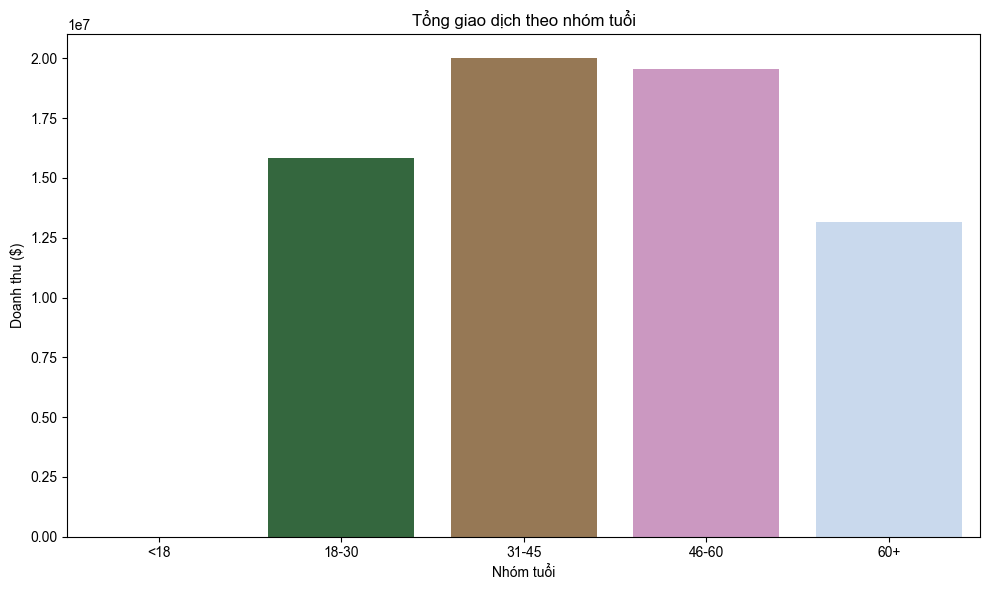

In [22]:
# Gọi hàm trực tiếp
visualize_transactions_over_time()
visualize_transactions_by_location()
visualize_transactions_by_gender()
visualize_transactions_by_age_group()

In [21]:
def visualize_transactions_by_age_group():
    bins = [0, 18, 30, 45, 60, 100]
    labels = ['<18', '18-30', '31-45', '46-60', '60+']
    df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    df_age = df.groupby('age')['price'].sum()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_age.index, y=df_age.values, palette='cubehelix')
    plt.title("Tổng giao dịch theo nhóm tuổi")
    plt.xlabel("Nhóm tuổi")
    plt.ylabel("Doanh thu ($)")
    plt.tight_layout()
    plt.show()
